<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_Stephen_ML_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stephen Feldman RIN: 662047892 (3/26/2025)

Machine Learning Homework 6

Problem 1

(a) (10 pts.) Calculate the first two principal components of the Scikit-learn / UCI ML
repository Wine Dataset using Scikit’s PCA algorithm.

(b) (10 pts.) What is the explained variance ratio of the first two principal components?

(c) (10 pts.) Use the first two principal components to train a SVM classifier to classify
the wines into three classes. Use a 60%-40% split for the train set and the test set.

(d) (10 pts.) Compare the accuracy, precision and recall of the SVM classifier with
that of a decision tree classifier that classifies the wines in to three classes using
the original features. Use the same 60%-40% split for the train set and the test set
for the decision tree classifier and use max_depth=3.

(e) (5 pts.) Plot the decision tree classifier.

Part A

In [ ]:
#Imports
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Load and Preprocess the Data
wine = load_wine()
X = wine.data
y = wine.target
# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
#Apply PCA
pca = PCA(n_components=2) # Create a PCA object with 2 components
principalComponents = pca.fit_transform(X_scaled) # Fit the model to the scaled data and transform it
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']) # Create a DataFrame for the principal components

In [ ]:
principalDf.head()


,principal component 1,principal component 2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


Part B

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.36198848 0.1920749 ]


Part C

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.4, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear') # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9722222222222222


Part D

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Create and train Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions with Decision Tree
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')

# Print results (assuming 'accuracy', 'y_test', 'y_pred' from SVM are available)
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")

print("\nSVM Classifier:")
print(f"Accuracy: {accuracy}")  # 'accuracy' from previous SVM code
svm_precision = precision_score(y_test, y_pred, average='weighted')  # Assuming 'y_test', 'y_pred' are available
svm_recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")

Decision Tree Classifier:
Accuracy: 0.9583333333333334
Precision: 0.9593253968253967
Recall: 0.9583333333333334

SVM Classifier:
Accuracy: 0.9722222222222222
Precision: 0.9722222222222222
Recall: 0.9722222222222222


Part E

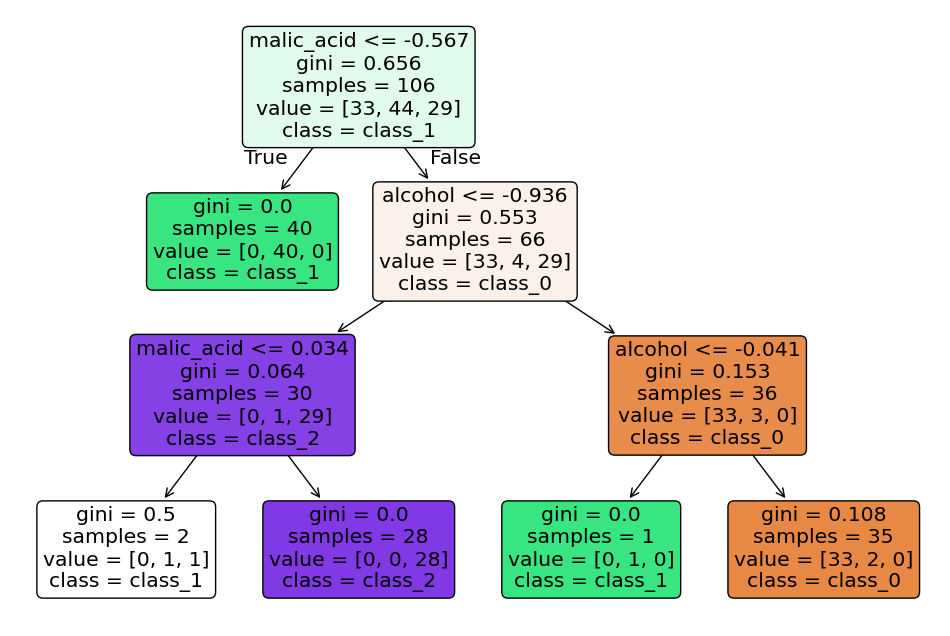

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plot_tree(dt_classifier,
          feature_names=wine.feature_names,  # Use wine.feature_names for feature labels
          class_names=wine.target_names,  # Use wine.target_names for class labels
          filled=True,
          rounded=True)
plt.show()

Problem 2:

Calculate the feature importance of the pixels in the images of the CIFAR-10
dataset (combine train and test sets) using a random forest classifier.

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      1181
           1       0.49      0.51      0.50      1188
           2       0.39      0.30      0.34      1232
           3       0.37      0.29      0.32      1274
           4       0.37      0.40      0.39      1179
           5       0.41      0.37      0.39      1230
           6       0.43      0.57      0.49      1123
           7       0.53      0.47      0.50      1217
           8       0.58      0.59      0.58      1189
           9       0.47      0.58      0.52      1187

    accuracy                           0.46     12000
   macro avg       0.46      0.46      0.45     12000
weighted avg       0.45      0.46      0.45     12000



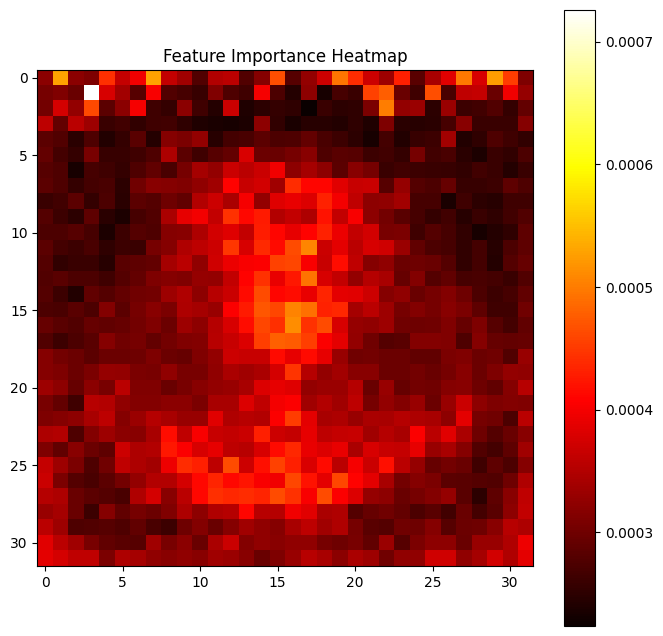

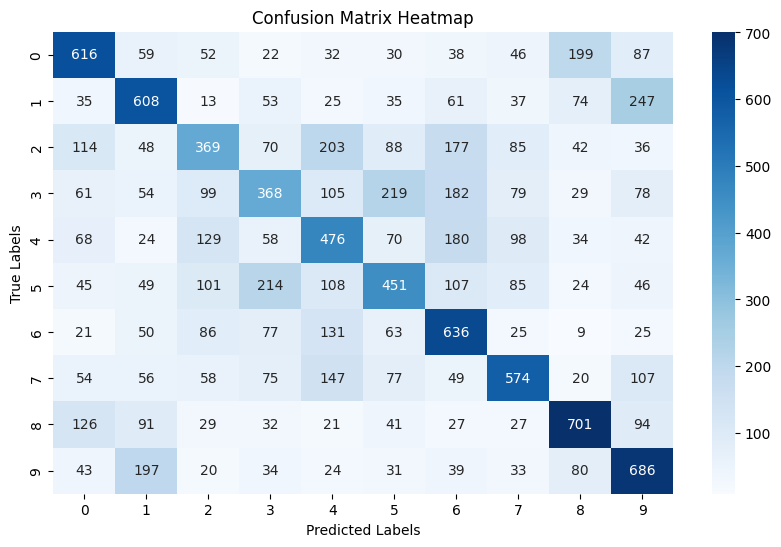

In [ ]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Merge train and test sets for feature importance calculation
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

# Normalize pixel values to [0, 1]
x_data = x_data / 255.0

# Reshape data for Random Forest: Flatten each image into a 1D feature vector
x_data = x_data.reshape(x_data.shape[0], -1)
y_data = y_data.ravel()  # Flatten the labels

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)
rf_classifier.fit(x_train, y_train)

# Get predictions
y_pred = rf_classifier.predict(x_test)

# Compute accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)  # Per-class precision

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get feature importance and reshape it to the image size (32x32x3)
feature_importance = rf_classifier.feature_importances_
feature_importance_image = feature_importance.reshape(32, 32, 3)

# Plot feature importance heatmap
plt.figure(figsize=(8, 8))
plt.imshow(np.mean(feature_importance_image, axis=2), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Feature Importance Heatmap")
plt.show()

# Plot accuracy and precision heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()


Problem 3:

Import the surface temperature data, surface_temp.npy, for a small sphere from
LMS. The temperature data is given for 1000 timesteps. Predict the temperatures for the
next 10 timesteps using a recurrent neural network.

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from google.colab import files

uploaded = files.upload() # prompts user to select file from local system
# Load the uploaded data
surface_temp = np.load('surface_temp.npy')  # replace with uploaded file name if different

# Create sequences for the RNN
lookback = 10  # Adjustable
sequences = []
targets = []
for i in range(lookback, len(surface_temp) - 10):  # Adjustable
    sequences.append(surface_temp[i - lookback:i])
    targets.append(surface_temp[i])

# Convert to NumPy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Create sequences for the RNN
lookback = 10
sequences = []
targets = []
for i in range(lookback, len(surface_temp) - 10):
    sequences.append(surface_temp[i - lookback:i])
    targets.append(surface_temp[i])

sequences = np.array(sequences)
targets = np.array(targets)

# Reshape the input to be [samples, time steps, features]
sequences = sequences.reshape(sequences.shape[0], sequences.shape[1], 1)

# Create the model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequences.shape[1], 1)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(sequences, targets, epochs=100, batch_size=32)

# Get the last 'lookback' timesteps as input for prediction
last_sequence = surface_temp[-lookback:]
last_sequence = last_sequence.reshape(1, lookback, 1)

# Predict the next 10 timesteps
predictions = []
for _ in range(10):
    prediction = model.predict(last_sequence)
    predictions.append(prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = prediction

print(predictions)

Saving surface_temp.npy to surface_temp (3).npy
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 88008.2422
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2466.0989
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.3385
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8053
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8003
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6549
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6281
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5911
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5903
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6938
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6232
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5889
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6040
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7148
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6380
Epoch 1

<ipython-input-5-a4a0a170e84f>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[np.float32(371.21756), np.float32(370.7884), np.float32(371.06332), np.float32(370.91974), np.float32(370.94705), np.float32(370.78323), np.float32(370.7434), np.float32(370.61078), np.float32(370.54706), np.float32(370.4227)]


In [6]:
for prediction in predictions:
  print(f"{prediction:.2f}")

371.22
370.79
371.06
370.92
370.95
370.78
370.74
370.61
370.55
370.42


10 predictions listed above.